# Decision Trees – Ejemplo básico con Iris

En este ejemplo veremos cómo entrenar y visualizar un Árbol de Decisión utilizando el dataset Iris.



In [124]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [125]:
print("Shape:", iris.shape)

Shape: (150, 5)


In [126]:
# Solo cogemos petal_length y petal_width para entender mejor el modelo
# En la realidad deberíamos tener todos los atributos
features = ['petal_length', 'petal_width']
# La target sí puede ser categórica, no hace falta transformarla
target = 'species'

X = iris[features].copy()
y = iris[target]

In [127]:
# Dividimos antes de entrenar
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% test
    random_state=42,     # reproducibilidad
    stratify=y           # mantener proporción de clases
)

In [128]:
# Entrenamos sin tener en cuenta hiperparámetros
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Representación del árbol
Representamos el árbol de decisión para ver qué aspecto tiene

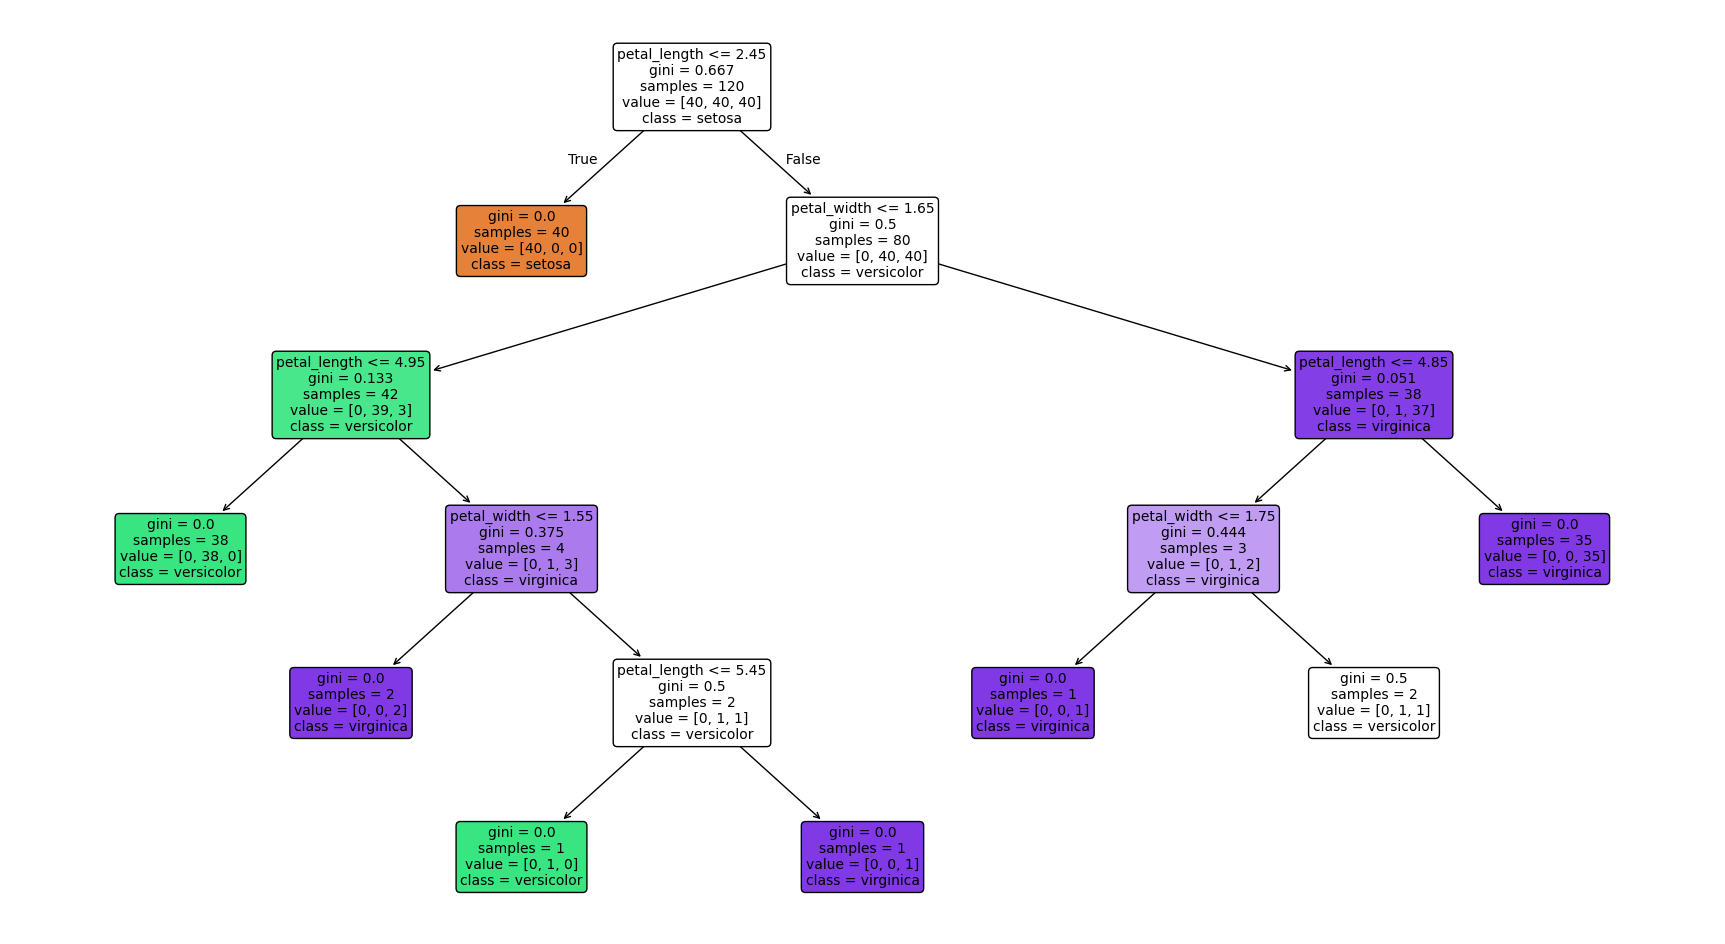

In [129]:
# Creamos una figura grande para que el árbol se vea bien
plt.figure(figsize=(22, 12))

# Dibujamos el árbol de decisión entrenado
plot_tree(
    tree_full,                # El modelo ya entrenado
    feature_names=features,   # Nombres de las columnas que estamos usando como X
    class_names=iris["species"].unique(),  # Nombres de las clases (setosa, versicolor, virginica)
    filled=True,              # Colorea los nodos según la clase predominante
    rounded=True,             # Esquinas redondeadas para mejorar la visualización
    fontsize=10               # Tamaño del texto dentro del árbol
)

# Mostramos la figura en pantalla
plt.show()

**Conclusiones del árbol**

* El primer split es `petal_length <= 2.45`, lo que indica que **petal_length es la variable más importante** para separar las especies.
* Con esa condición, el árbol identifica **Iris setosa de forma perfecta** (`gini = 0.0`), ya que ninguna otra especie tiene pétalos tan cortos.
* Las otras dos especies (**versicolor** y **virginica**) necesitan más divisiones. El siguiente criterio clave es `petal_width`, que las separa mejor.
* Algunas hojas muestran algo de mezcla (gini > 0), lo que refleja que **versicolor y virginica tienen cierto solapamiento**.
* El árbol generado es bastante profundo y tiene nodos con muy pocas muestras, lo cual sugiere **posible sobreajuste**.
* Más adelante veremos cómo limitar la profundidad (`max_depth`) para obtener un modelo más simple y que generalice mejor.

Evaluamos con métricas si realmente hay overfitting o underfitting:

In [130]:
# Accuracy train vs test
print("Accuracy TRAIN:", tree_full.score(X_train, y_train))
print("Accuracy TEST :", tree_full.score(X_test, y_test))

Accuracy TRAIN: 0.9916666666666667
Accuracy TEST : 0.9333333333333333


**Conclusiones sobre el rendimiento del modelo**

* El modelo obtiene una **accuracy muy alta en entrenamiento** (0.99), lo que significa que aprende casi perfectamente los datos de *train*.
* En *test*, la accuracy baja a **0.93**, pero sigue siendo un valor muy bueno.
* La diferencia entre ambos valores **no es excesiva**, así que el modelo no está sobreajustando de manera grave.
* Sí existe una ligera tendencia al **overfitting** (el árbol es bastante profundo), pero el rendimiento en test sigue siendo excelente, especialmente teniendo en cuenta que solo estamos usando dos características (`petal_length` y `petal_width`).
* Con un `max_depth` más pequeño, probablemente obtendríamos un modelo **más simple** y con un rendimiento en test **muy similar**.

## Evaluación del modelo

In [131]:
# Predicciones del modelo
y_pred = tree_full.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


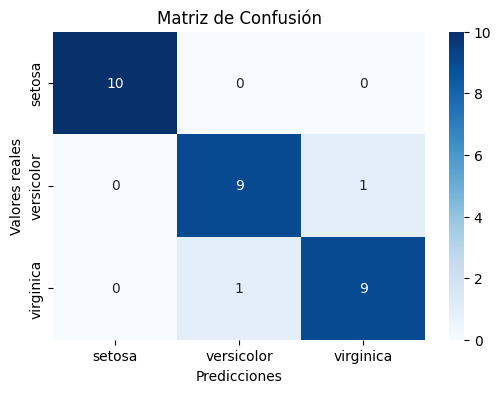

In [132]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases (en el mismo orden que aparecen en cm)
labels = iris["species"].unique()   # setosa, versicolor, virginica

# Representación como mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

**Conclusiones de las métricas**

* La **accuracy** es **0.93**, lo cual es totalmente normal en el dataset Iris, ya que las clases están muy bien separadas (y estamos usando solo los dos atributo que mejor distingue unas clases de otras).
* La matriz de confusión muestra que el modelo:
  * **Clasifica perfectamente** a *setosa* (10/10 aciertos).
  * Comete **un único error** entre *versicolor* y *virginica* (1 confusión en cada sentido).
* Esto confirma que **setosa es la clase más fácil** (pétalos muy distintos) y que **las únicas dudas del modelo** están entre *versicolor* y *virginica*, que son más parecidas entre sí.
* En general, el árbol consigue una **clasificación muy sólida y coherente**, especialmente teniendo en cuenta que solo usamos **dos características** (`petal_length` y `petal_width`).


# Ajuste hiperparámetros - Decision Trees

En este ejemplo veremos cómo entrenar un Árbol de Decisión ajustando hiperparámetros para evitar el overfitting.



In [133]:
# Probamos varios valores a mano (puedes cambiarlos para ver qué combinaciones son mejores)
tree_test = DecisionTreeClassifier(
    max_depth=3,           # prueba 2, 3, 4, 5...
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

tree_test.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

## Representación del árbol
Representamos el árbol de decisión para ver qué aspecto tiene

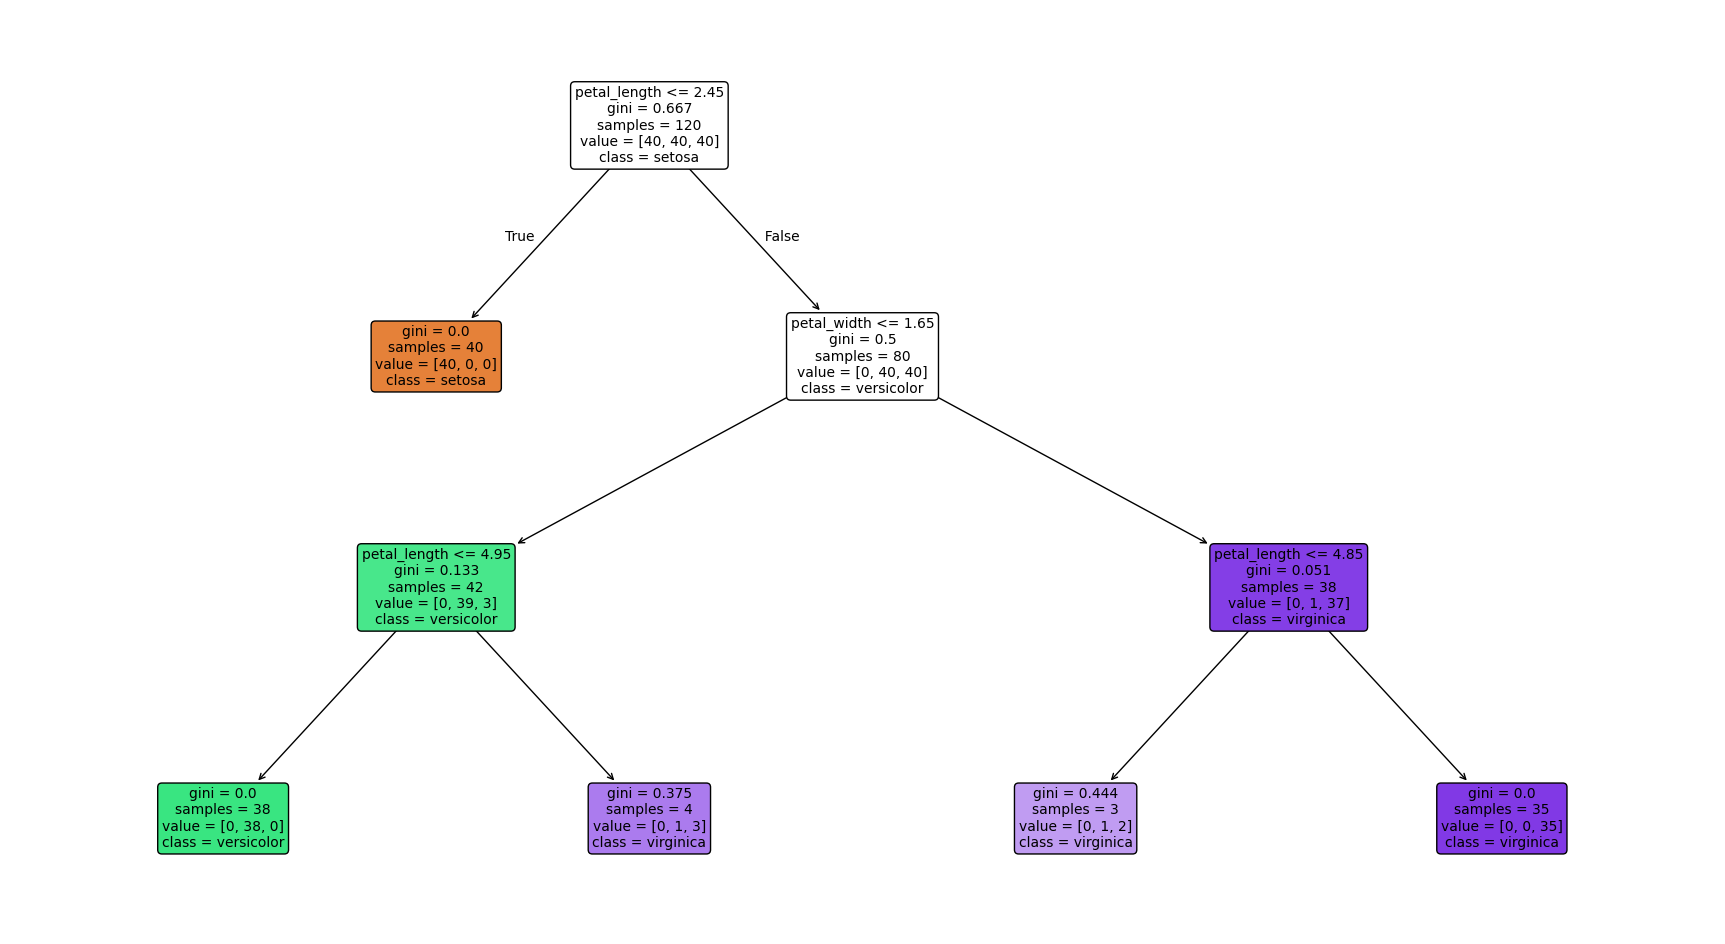

In [134]:
# Creamos una figura grande para que el árbol se vea bien
plt.figure(figsize=(22, 12))

# Dibujamos el árbol de decisión entrenado
plot_tree(
    tree_test,                # El modelo ya entrenado
    feature_names=features,   # Nombres de las columnas que estamos usando como X
    class_names=iris["species"].unique(),  # Nombres de las clases (setosa, versicolor, virginica)
    filled=True,              # Colorea los nodos según la clase predominante
    rounded=True,             # Esquinas redondeadas para mejorar la visualización
    fontsize=10               # Tamaño del texto dentro del árbol
)

# Mostramos la figura en pantalla
plt.show()

Evaluamos con métricas si realmente hay overfitting o underfitting:

In [135]:
# Accuracy train vs test
print("Accuracy TRAIN:", tree_test.score(X_train, y_train))
print("Accuracy TEST :", tree_test.score(X_test, y_test))

Accuracy TRAIN: 0.9833333333333333
Accuracy TEST : 0.9666666666666667


**Conclusiones del modelo ajustado**:

* El modelo obtiene **0.98 de accuracy en entrenamiento**, lo que significa que sigue aprendiendo muy bien los patrones principales del dataset.
* En test la accuracy **sube incluso a 0.96**, lo cual indica que el modelo **generaliza mejor** que la versión anterior.
* La diferencia entre train (0.98) y test (0.96) es **muy pequeña**, lo que demuestra que el modelo está **bien equilibrado**, sin sobreajuste ni subajuste.
* El árbol limitado con hiperparámetros ajustados está capturando **las reglas importantes** sin caer en una estructura demasiado compleja.

---

**¡¡ OJO !! ¿Sería sospechoso en un dataset real obtener resultados tan altos?**

Sí, en un **dataset realista** (con ruido, valores faltantes, errores, clases solapadas…) una accuracy del **96%** con un modelo tan simple suele ser **poco habitual**.

Pero en el caso de **Iris** esto es completamente normal, porque:

* es un dataset **muy limpio**
* las clases están **muy bien separadas**
* no hay ruido ni outliers
* solo usan dos variables (`petal_length` y `petal_width`) que separan casi perfectamente las especies
* Iris fue diseñado para ser **fácil de clasificar** y para enseñar modelos básicos

Por eso, obtener accuracies **entre 90% y 98%** no solo es normal…
👉 **es lo esperable en Iris.**

En datasets reales como **Titanic**, accuracies tan altas serían más sospechosas y probablemente indicarían:

* fuga de datos (*data leakage*)
* árboles demasiado profundos
* problemas de validación


## Evaluación del modelo

In [136]:
# Predicciones del modelo
y_pred = tree_test.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


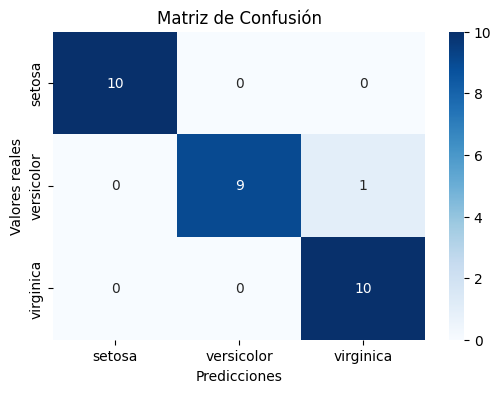

In [137]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases (en el mismo orden que aparecen en cm)
labels = iris["species"].unique()   # setosa, versicolor, virginica

# Representación como mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

**Conclusiones**

* El modelo alcanza una **accuracy del 96.67%**, un rendimiento muy alto y completamente coherente con el dataset Iris.
* La matriz de confusión muestra que el árbol **clasifica perfectamente** a `setosa` y `virginica`, sin cometer ningún error con estas dos especies.
* Solo aparece **un error**: una flor *versicolor* que ha sido clasificada como *virginica*. Esto es normal, ya que estas dos especies son las más parecidas entre sí y suelen solaparse.
* El rendimiento es incluso mejor que el del árbol sin ajustar, lo que confirma que los hiperparámetros (`max_depth`, `min_samples_split`, `min_samples_leaf`) han permitido obtener un árbol **más simple** pero que **generaliza mejor**.
* La ausencia de errores en dos de las tres clases y el número muy reducido de confusiones indican que el modelo está **bien equilibrado**, sin sobreajuste y con una capacidad de predicción excelente.

## Análisis de importancia

In [138]:
importances = tree_test.feature_importances_
importances

array([0.57907728, 0.42092272])

In [139]:
# Recuerda que la variable features la creamos más arriba antes de la división
# features = ['petal_length', 'petal_width']
for name, value in zip(features, importances):
    print(name, ":", value)

petal_length : 0.5790772828399291
petal_width : 0.42092271716007074


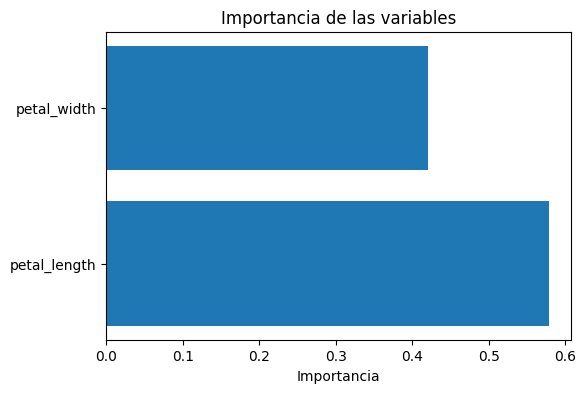

In [140]:
plt.figure(figsize=(6, 4))
plt.barh(features, importances)
plt.xlabel("Importancia")
plt.title("Importancia de las variables")
plt.show()

# GridSearchCV - Decision Trees

En este ejemplo veremos cómo conseguir el mejor Árbol de decisión para nuestro problema.



In [141]:
param_grid = {
    "max_depth": [2, 3, 4, 5, None],        # 5 opciones
    "min_samples_split": [2, 5, 10],        # 3 opciones
    "min_samples_leaf": [1, 2, 5]           # 3 opciones
}

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Creamos un árbol base (sin configurar hiperparámetros)
# GridSearchCV será quien pruebe distintas combinaciones
tree = DecisionTreeClassifier(random_state=42)

# Configuramos GridSearchCV
grid = GridSearchCV(
    estimator=tree,      # Modelo base que queremos optimizar
    param_grid=param_grid,  # Diccionario con las combinaciones de hiperparámetros a probar
    cv=5,                # Validación cruzada de 5 particiones
    scoring="accuracy"   # Métrica que usaremos para elegir el mejor modelo
)

# Entrenamos el GridSearch: prueba todas las combinaciones en param_grid
grid.fit(X_train, y_train)

# Mostramos la mejor combinación encontrada
print("Mejores hiperparámetros:", grid.best_params_)

# Obtenemos directamente el árbol entrenado con los mejores parámetros
best_tree = grid.best_estimator_

Mejores hiperparámetros: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


## Representación del árbol
Representamos el árbol de decisión para ver qué aspecto tiene

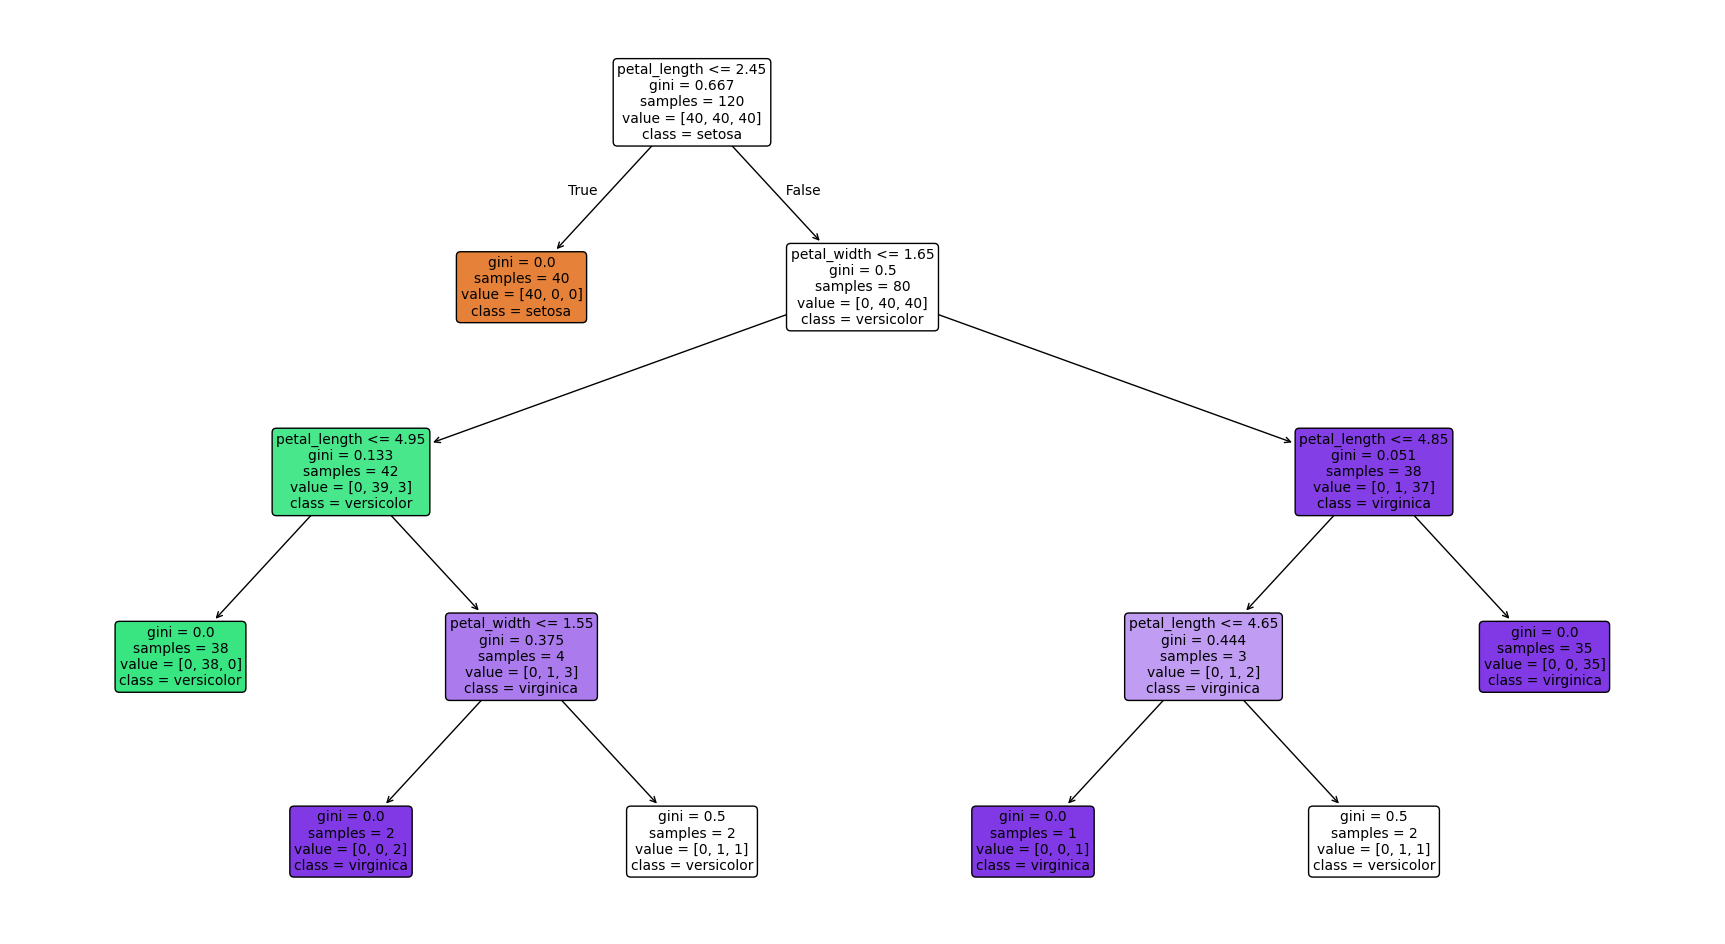

In [143]:
# Creamos una figura grande para que el árbol se vea bien
plt.figure(figsize=(22, 12))

# Dibujamos el árbol de decisión entrenado
plot_tree(
    best_tree,                # El modelo ya entrenado
    feature_names=features,   # Nombres de las columnas que estamos usando como X
    class_names=iris["species"].unique(),  # Nombres de las clases (setosa, versicolor, virginica)
    filled=True,              # Colorea los nodos según la clase predominante
    rounded=True,             # Esquinas redondeadas para mejorar la visualización
    fontsize=10               # Tamaño del texto dentro del árbol
)

# Mostramos la figura en pantalla
plt.show()

Evaluamos con métricas si realmente hay overfitting o underfitting:

In [144]:
# Accuracy train vs test
print("Accuracy TRAIN:", best_tree.score(X_train, y_train))
print("Accuracy TEST :", best_tree.score(X_test, y_test))

Accuracy TRAIN: 0.9833333333333333
Accuracy TEST : 0.9333333333333333


## Evaluación del modelo

In [145]:
# Predicciones del modelo
y_pred = best_tree.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


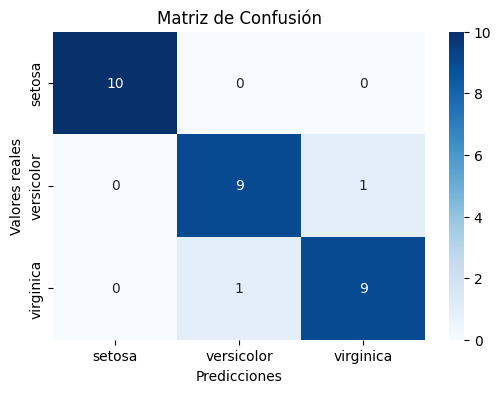

In [146]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases (en el mismo orden que aparecen en cm)
labels = iris["species"].unique()   # setosa, versicolor, virginica

# Representación como mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

## Análisis de importancia

In [147]:
importances = best_tree.feature_importances_
importances

array([0.57716406, 0.42283594])

In [148]:
# Recuerda que la variable features la creamos más arriba antes de la división
# features = ['petal_length', 'petal_width']
for name, value in zip(features, importances):
    print(name, ":", value)

petal_length : 0.5771640640061693
petal_width : 0.4228359359938307


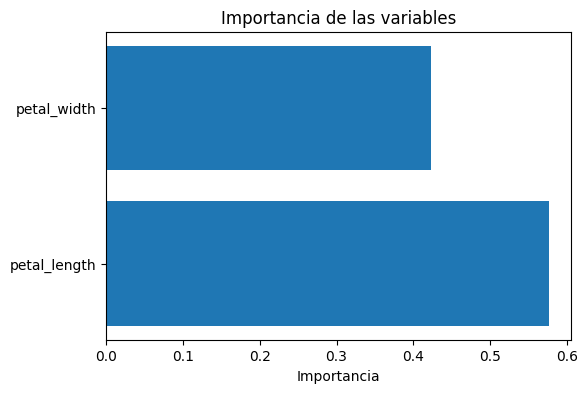

In [149]:
plt.figure(figsize=(6, 4))
plt.barh(features, importances)
plt.xlabel("Importancia")
plt.title("Importancia de las variables")
plt.show()